# data 불러오기

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np

In [19]:
file_path = '/content/자동차업계.csv'

In [20]:
stock = pd.read_csv(file_path)
stock = stock.rename(columns={"Unnamed: 0":'날짜'})
print(stock.shape)
stock

(159994, 13)


,날짜,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,기업명,기업코드
0,2021-06-30,89600,100,0.11,89500,90200,89200,1532598,137219994800,36320555891200,405363347,기아,270
1,2021-06-29,89500,0,0.00,90000,91300,89100,1631173,146716869300,36280019556500,405363347,기아,270
2,2021-06-28,89500,-1200,-1.32,91100,91200,89100,1889876,169325403700,36280019556500,405363347,기아,270
3,2021-06-25,90700,100,0.11,91300,91500,89700,1821258,164913707300,36766455572900,405363347,기아,270
4,2021-06-24,90600,400,0.44,91000,93700,90300,4353794,401006917400,36725919238200,405363347,기아,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159989,2015-05-12,17600,-400,-2.22,17950,18200,17400,199870,3554912300,160726068800,9132163,우리산업,215360
159990,2015-05-11,18000,250,1.41,17850,18500,17050,473743,8463149850,164378934000,9132163,우리산업,215360
159991,2015-05-08,17750,950,5.65,16950,17800,16450,383330,6578937850,162095893250,9132163,우리산업,215360
159992,2015-05-07,16800,1200,7.69,16350,17900,16000,942417,15883775200,153420338400,9132163,우리산업,215360


# preprocessing

## 현대자동차와 동일한 길이의 데이터를 갖지 않는 기업 데이터 제거

In [21]:
stock[stock['기업명'] == '현대자동차'].shape[0]

1598

In [23]:
print(stock.shape)
stock

(142222, 13)


,날짜,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,기업명,기업코드
0,2015-01-02,1885,-35,-1.82,1920,1920,1885,1220,2301890,11389226550,6042030,CBI,13720
1,2015-01-05,1870,-15,-0.80,1845,1895,1835,704,1305765,11298596100,6042030,CBI,13720
2,2015-01-06,1875,5,0.27,1870,2100,1845,36653,69965595,11328806250,6042030,CBI,13720
3,2015-01-07,1815,-60,-3.20,1885,1905,1800,39420,71882120,10966284450,6042030,CBI,13720
4,2015-01-08,1850,35,1.93,1815,1850,1800,5463,9913770,11177755500,6042030,CBI,13720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142217,2021-06-24,2725,115,4.41,2595,3035,2420,75365720,210419625995,99118842075,36373887,화신정공,126640
142218,2021-06-25,2620,-105,-3.85,2700,2735,2620,4236987,11297444365,95299583940,36373887,화신정공,126640
142219,2021-06-28,2555,-65,-2.48,2635,2670,2530,3030999,7876450885,92935281285,36373887,화신정공,126640
142220,2021-06-29,2610,55,2.15,2520,2610,2515,2024556,5202769720,94935845070,36373887,화신정공,126640


## 거래량 0 포함된 기업 삭제 

In [24]:
stock[stock['거래량'] == 0]

,날짜,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,기업명,기업코드
1591,2021-06-22,22750,0,0.0,0,0,0,0,0,186067040250,8178771,CBI,13720
1592,2021-06-23,22750,0,0.0,0,0,0,0,0,186067040250,8178771,CBI,13720
1593,2021-06-24,22750,0,0.0,0,0,0,0,0,186067040250,8178771,CBI,13720
1594,2021-06-25,22750,0,0.0,0,0,0,0,0,186067040250,8178771,CBI,13720
1595,2021-06-28,22750,0,0.0,0,0,0,0,0,186067040250,8178771,CBI,13720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138945,2021-03-08,3650,0,0.0,0,0,0,0,0,252013793750,69044875,화승코퍼레이션,13520
138946,2021-03-09,3650,0,0.0,0,0,0,0,0,252013793750,69044875,화승코퍼레이션,13520
138947,2021-03-10,3650,0,0.0,0,0,0,0,0,252013793750,69044875,화승코퍼레이션,13520
138948,2021-03-11,3650,0,0.0,0,0,0,0,0,252013793750,69044875,화승코퍼레이션,13520


In [26]:
print(stock.shape)
print(stock['기업명'].unique())
stock

(99076, 13)
['KB오토시스' 'SNT모티브' 'SNT중공업' '경창산업' '광진윈텍' '구영테크' '기아' '네오티스' '대우부품' '대원강업'
 '대원산업' '대유에이텍' '덕양산업' '도이치모터스' '동원금속' '디아이씨' '디젠스' '모베이스전자' '모토닉' '부산주공'
 '삼기' '삼보모터스' '삼성공조' '삼원강재' '상신브레이크' '새론오토모티브' '서연이화' '서진오토모티브' '성우하이텍'
 '성창오토텍' '세종공업' '에스제이엠' '에스제이엠홀딩스' '에코플라스틱' '엔브이에이치코리아' '엘브이엠씨' '엠에스오토텍'
 '영화금속' '오스템' '오텍' '우수AMS' '유니크' '유성기업' '인지컨트롤스' '인팩' '일지테크' '지엠비코리아'
 '캐스텍코리아' '케이비아이동국실업' '코리아에프티' '태원물산' '티피씨글로벌' '평화산업' '평화홀딩스' '피에이치에이'
 '한일단조' '현대공업' '현대모비스' '현대위아' '현대자동차' '화신' '화신정공']


,날짜,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,기업명,기업코드
0,2015-01-02,3910,30,0.77,3880,3955,3875,1506,5919135,44965000000,11500000,KB오토시스,24120
1,2015-01-05,3925,15,0.38,3910,3940,3880,2125,8312805,45137500000,11500000,KB오토시스,24120
2,2015-01-06,3930,5,0.13,3935,3950,3875,1891,7357635,45195000000,11500000,KB오토시스,24120
3,2015-01-07,3920,-10,-0.25,3950,3950,3870,1323,5184490,45080000000,11500000,KB오토시스,24120
4,2015-01-08,3860,-60,-1.53,3920,3960,3830,3559,13894410,44390000000,11500000,KB오토시스,24120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99071,2021-06-24,2725,115,4.41,2595,3035,2420,75365720,210419625995,99118842075,36373887,화신정공,126640
99072,2021-06-25,2620,-105,-3.85,2700,2735,2620,4236987,11297444365,95299583940,36373887,화신정공,126640
99073,2021-06-28,2555,-65,-2.48,2635,2670,2530,3030999,7876450885,92935281285,36373887,화신정공,126640
99074,2021-06-29,2610,55,2.15,2520,2610,2515,2024556,5202769720,94935845070,36373887,화신정공,126640


## 현대자동차 관련기업 종가 추출

In [27]:
corps = ['현대자동차','현대모비스','현대위아','기아','성우하이텍','서연이화']

In [28]:
car_df

,현대자동차,현대모비스,현대위아,기아,성우하이텍,서연이화
0,169000,239500,179500,52300,12000,13600
1,168000,238000,179500,52000,12300,13200
2,164500,229000,175000,51200,12150,13350
3,170000,230500,184000,51800,12500,13950
4,178000,230500,192500,52200,12450,13900
...,...,...,...,...,...,...
1593,242500,290500,107000,90600,7640,9450
1594,243000,292500,107500,90700,7650,9450
1595,241000,290500,103000,89500,7540,9770
1596,239500,289500,99400,89500,7430,9180


## 10일 간격의 데이터로 다음 날 주식 종가를 예측하기 위한 학습 데이터 생성

In [29]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
train_feature = None
train_label = None

In [30]:
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label)

In [31]:
print(train_feature[-2:])
print(train_label[-2:])

[[[289000  88800  88400   7110   9290]
  [289500  92100  89100   7060   9460]
  [287500  92700  87600   7070   9530]
  [287000  97500  88500   7260   9510]
  [284500  98600  87400   6870   9090]
  [294000 105000  89800   7140   9030]
  [292500 108500  90200   7050   8980]
  [290500 107000  90600   7640   9450]
  [292500 107500  90700   7650   9450]
  [290500 103000  89500   7540   9770]]

 [[289500  92100  89100   7060   9460]
  [287500  92700  87600   7070   9530]
  [287000  97500  88500   7260   9510]
  [284500  98600  87400   6870   9090]
  [294000 105000  89800   7140   9030]
  [292500 108500  90200   7050   8980]
  [290500 107000  90600   7640   9450]
  [292500 107500  90700   7650   9450]
  [290500 103000  89500   7540   9770]
  [289500  99400  89500   7430   9180]]]
[[239500]
 [239500]]


# Keras RNN

## 입력변수 & 목표변수

In [32]:
X = train_feature
y = train_label

In [33]:
print(X.shape)
print(y.shape)

(1588, 10, 5)
(1588, 1)


## 데이터 분할

In [34]:
from sklearn.model_selection import train_test_split

# train:test - 8:2 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# train:val - 8:2 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Keras 모델 만들기

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [36]:
model = Sequential()
model.add(SimpleRNN(8, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(1))

model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=50, verbose=2, validation_data=(X_val, y_val))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 112       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
32/32 - 2s - loss: 21252864000.0000 - mse: 21252864000.0000 - val_loss: 13979826176.0000 - val_mse: 13979826176.0000
Epoch 2/50
32/32 - 0s - loss: 7835065344.0000 - mse: 7835065344.0000 - val_loss: 2471095808.0000 - val_mse: 2471095808.0000
Epoch 3/50
32/32 - 0s - loss: 747252800.0000 - mse: 747252800.0000 - val_loss: 449717504.0000 - val_mse: 449717504.0000
Epoch 4/50
32/32 - 0s - loss: 348131200.0000 - mse: 348131200.0000 - val_loss: 365760320.0000 - val_mse: 365760320.0000
Epoch 5/50
32/32 - 0s - loss

## loss 변화 시각화

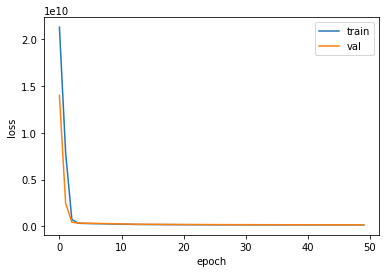

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

## 학습 & 테스트 결과

In [38]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Train RMSE: {train_rmse.round(2)}")
print(f"Test RMSE: {test_rmse.round(2)}")

Train RMSE: 12746.59
Test RMSE: 41657.77


## test 예측 결과 시각화

In [40]:
corps_name = "현대자동차"

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test.ravel(),
                    mode='lines',
                    name='test'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=test_pred.ravel(),
                    line=dict(dash='dash', width=3),
                    name='pred'))

fig.update_layout(
    title=f"{corps_name} 종가 실제값-예측값",
    height=500)
fig.show()